# Credti Card fraud detection

Data science task: Imbalanced binary classification using cost-sensitive learning

## 0. Extracting dataset from Kaggle

In [3]:
import kaggle

In [5]:
def extract_kaggle_dataset(url_kaggle):
    """ Connect with given kaggle url to download all available files.
    Arg:
        url_kaggle (string): kaggle url from any repository you want to download files.
    """
    # This extract all files from a given kaggle url
    kaggle.api.dataset_download_files(url_kaggle, quiet=False, unzip=True)

In [6]:
extract_kaggle_dataset('mlg-ulb/creditcardfraud')

100%|██████████| 66.0M/66.0M [00:16<00:00, 4.25MB/s]


## 1. Loading from local directory

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load credit card fraud data
fraud = pd.read_csv('creditcard.csv')

## 2. Exploratory Data Analysis

In [3]:
# Look to the data
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# Credit card fraud PCA components descriptive stats
fraud.drop(columns=['Time','Amount']).describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [39]:
# Credit card fraud time and amount fearure descriptive stats
fraud[['Time','Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


In [3]:
# credit card fraud dataset dimesions
fraud.shape

(284807, 31)

In [5]:
# Transaction type counts
fraud['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

It's is highly imbalanced

In [5]:
fraud['Class'].value_counts().rename(index={0:'True', 1:'Fradulent'})

True         284315
Fradulent       492
Name: Class, dtype: int64

Text(0.5, 0, 'Type of transaction')

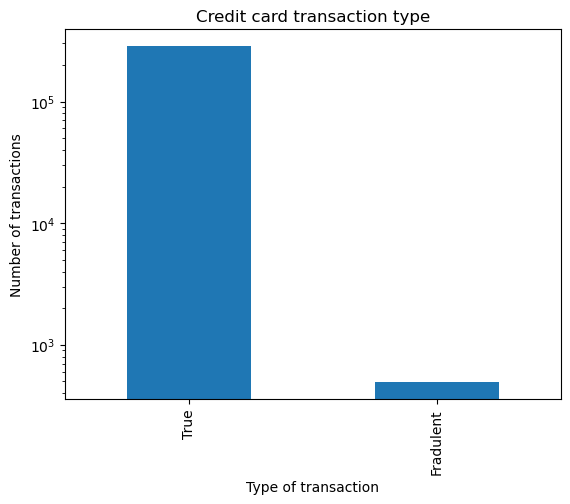

In [7]:
fraud['Class'].value_counts().rename(index={0:'True', 1:'Fradulent'}).plot.bar(logy=True)
plt.title('Credit card transaction type')
plt.ylabel('Number of transactions (log(counts))')
plt.xlabel('Type of transaction')
plt.show()

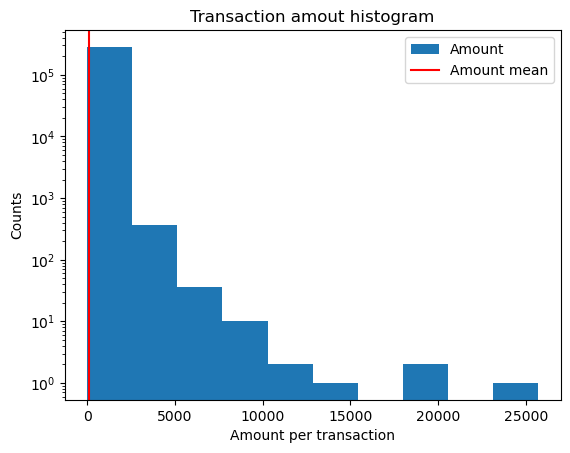

In [25]:
fraud['Amount'].plot.hist(logy=True)
plt.axvline(x=fraud['Amount'].mean(), color = 'r', label = 'Amount mean')
plt.title('Transaction amount histogram')
plt.xlabel('Amount per transaction')
plt.ylabel('log(Counts)')
plt.legend()
plt.show()

<Axes: >

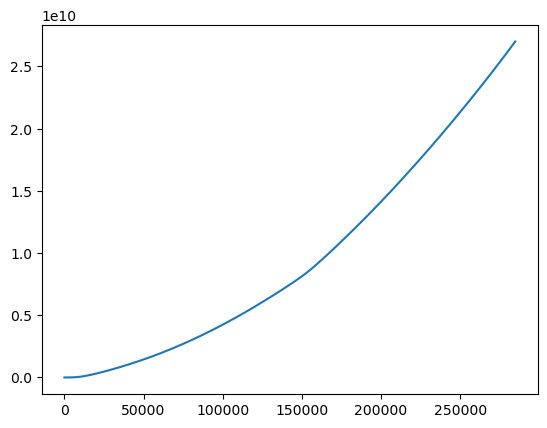

In [27]:
fraud['Time'].cumsum().plot()

### 2.2. PCA analysis 

There are 2 feature selection type. one using the component with the hightest explained variance and using the componet with the hightest eigenvalue per component.

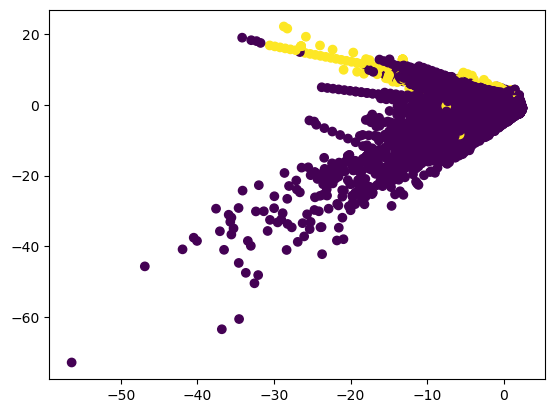

In [33]:
plt.scatter(x=fraud['V1'],y=fraud['V2'], c=fraud['Class'])
plt.show()

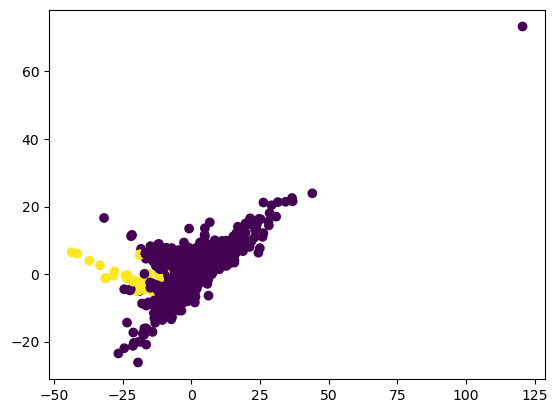

In [35]:
plt.scatter(x=fraud['V7'],y=fraud['V6'], c=fraud['Class'])
plt.show()

In [28]:
fraud.drop(columns=['Time','Amount','Class']).max().sort_values(ascending=False)

V7     120.589494
V6      73.301626
V20     39.420904
V5      34.801666
V28     33.847808
V27     31.612198
V21     27.202839
V10     23.745136
V23     22.528412
V2      22.057729
V8      20.007208
V16     17.315112
V4      16.875344
V9      15.594995
V11     12.018913
V14     10.526766
V22     10.503090
V3       9.382558
V17      9.253526
V15      8.877742
V12      7.848392
V25      7.519589
V13      7.126883
V19      5.591971
V18      5.041069
V24      4.584549
V26      3.517346
V1       2.454930
dtype: float64

### 2.3. Correlation between features and labels

It's use Point Biserial correlation to calculate correlation between continuos and binary variable. There's significate staIf p-value is less than 0.05

In [7]:
from scipy import stats

In [13]:
for c in fraud.drop(columns=['Time','Amount','Class']).columns:
    print(c, stats.pointbiserialr(fraud['Class'], fraud[c]))

V1 SignificanceResult(statistic=-0.10134729859508607, pvalue=0.0)
V2 SignificanceResult(statistic=0.09128865034462016, pvalue=0.0)
V3 SignificanceResult(statistic=-0.19296082706741524, pvalue=0.0)
V4 SignificanceResult(statistic=0.13344748623900582, pvalue=0.0)
V5 SignificanceResult(statistic=-0.09497429899144924, pvalue=0.0)
V6 SignificanceResult(statistic=-0.04364316069996427, pvalue=4.213111345325936e-120)
V7 SignificanceResult(statistic=-0.1872565915142998, pvalue=0.0)
V8 SignificanceResult(statistic=0.01987512391479456, pvalue=2.7406731012506354e-26)
V9 SignificanceResult(statistic=-0.09773268607407982, pvalue=0.0)
V10 SignificanceResult(statistic=-0.21688294364102964, pvalue=0.0)
V11 SignificanceResult(statistic=0.154875644743949, pvalue=0.0)
V12 SignificanceResult(statistic=-0.2605929248772197, pvalue=0.0)
V13 SignificanceResult(statistic=-0.004569778799461305, pvalue=0.014737338961000997)
V14 SignificanceResult(statistic=-0.3025436958044071, pvalue=0.0)
V15 SignificanceResult(s

In [14]:
stats.pointbiserialr(fraud['Class'], fraud['Time'])

SignificanceResult(statistic=-0.012322570929245751, pvalue=4.818268891796334e-11)

In [15]:
stats.pointbiserialr(fraud['Class'], fraud['Amount'])

SignificanceResult(statistic=0.0056317530067686, pvalue=0.002651220649191581)

Since the p-value of this correlation is not less than .05, this correlation is not statistically significant. 

Higher coefficients denote a stronger magnitude of relationship between variables. Smaller coefficients denote weaker relationships. 

Components 22, 23 and 25 has not significant correlation. Components 1 3 4 7 10 11 12 14 16 17 18 has > 10 coefficients with the strongest magnitud of relationship with labels 

### 2.3. Correlation between PCA features 

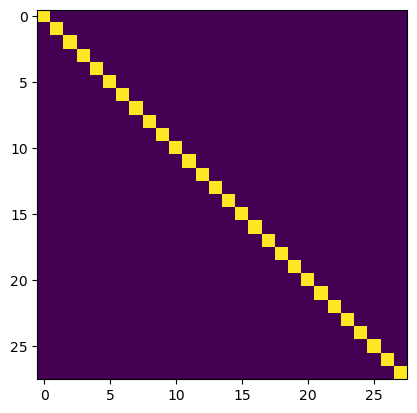

In [5]:
plt.imshow(fraud.drop(columns=['Class','Time','Amount']).corr())

It is expected to have correlation coefficients near to 0 because PCA components are linearlly independent.

In [5]:
fraud[['Time','Amount']].corr()

,Time,Amount
Time,1.000000,-0.010596
Amount,-0.010596,1.000000


## 3. Imbalanced classification with linearSVM (MVP)

I'm going to run classification using just PCA components as inut feature with and without cost-sensitive learning to compare results. I'll expect that hyperparameter tunning and crossvalidation optimal k-fold change.

In [4]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### 3.1. Imbalanced PCA components only.

In [5]:
# A numpy random state object to create random state instances at each use
rng = np.random.RandomState(0)

# Dividing dataset in input features and labels
y = fraud['Class']
X = fraud.drop(columns=['Time','Amount','Class'])

# Spliting data into train/test  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)

3.1.1. Inspecting effect of SVM's C parameter and l-norm (regularization) on imbalanced learning.

I would like to see how C parameter and l-norm behaves with this imbalanced dataset. For doing so, I'll use repeted Stratified 3 fold with 100 repeats each. Later, I compare the C/l-norm parameter pairs results to see if they are statistical different. If there's no statistical differences, the criterion for pick the right C/l-norm parameter pairs with be on fitting time.

The experiments goes as follows:
1) I'll run a 3-fold crossvalidation grid search routine to find the 3 best pair candidates (C and L-norm) on the same crossvalidated partitions.
2) I'll run a 3-fold repeted stratified crossvalidation grid search routine to get 90 samples for each pair canditates.
3) I'll run a t-student hypothesis test to find if there's statitical differences between the 3 pair candidates.
4) If there's no difference, I'll pick the pair candidate with the lowest fitting time.

In [ ]:
# Grid search hyperparameter tunnig routine for 1)

# Parameters to search
parameters = {'penalty':('l1', 'l2'), 
              'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100]
             }

# Creating estimator instance

lsvc = LinearSVC(dual=False, random_state=rng)

# Creating grid search instance
search = GridSearchCV(estimator=lsvc, param_grid=parameters, scoring="f1", cv=3, verbose=3)

# Fitting grid search instance
search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ...............C=0.001, penalty=l1;, score=0.448 total time=   0.9s
[CV 2/3] END ...............C=0.001, penalty=l1;, score=0.577 total time=   0.8s
[CV 3/3] END ...............C=0.001, penalty=l1;, score=0.462 total time=   0.8s
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.615 total time=   1.1s
[CV 2/3] END ...............C=0.001, penalty=l2;, score=0.734 total time=   1.1s
[CV 3/3] END ...............C=0.001, penalty=l2;, score=0.642 total time=   1.0s
[CV 1/3] END ...............C=0.005, penalty=l1;, score=0.594 total time=   0.9s
[CV 2/3] END ...............C=0.005, penalty=l1;, score=0.710 total time=   1.2s
[CV 3/3] END ...............C=0.005, penalty=l1;, score=0.628 total time=   1.4s
[CV 1/3] END ...............C=0.005, penalty=l2;, score=0.653 total time=   0.8s
[CV 2/3] END ...............C=0.005, penalty=l2;, score=0.750 total time=   0.8s
[CV 3/3] END ...............C=0.005, penalty=l2;

In [13]:
# Storing resutls in a data frame
results = pd.DataFrame(data=search.cv_results_)

In [14]:

results[(results['rank_test_score'] == 1) | (results['rank_test_score'] == 2) | (results['rank_test_score'] == 3)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lsvc__C,param_lsvc__penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
7,0.512770,0.026434,0.030341,0.000362,0.05,l2,"{'lsvc__C': 0.05, 'lsvc__penalty': 'l2'}",0.679803,0.755760,0.663265,0.69961,0.040275,2
8,6.037984,0.810324,0.030357,0.000205,0.1,l1,"{'lsvc__C': 0.1, 'lsvc__penalty': 'l1'}",0.679803,0.761468,0.659898,0.70039,0.043947,1
9,0.523567,0.035181,0.030364,0.000218,0.1,l2,"{'lsvc__C': 0.1, 'lsvc__penalty': 'l2'}",0.679803,0.755760,0.663265,0.69961,0.040275,2


In [12]:
parameters = {'penalty':('l1', 'l2'), 
              'C':[0.05, 0.1]
             }

lsvc = LinearSVC(dual=False, random_state=rng)

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=30, random_state=0)

search = GridSearchCV(estimator=lsvc, param_grid=parameters, scoring="f1", cv=cv, verbose=3)

search.fit(X_train, y_train)

Fitting 90 folds for each of 4 candidates, totalling 360 fits
[CV 1/90] END ...............C=0.05, penalty=l1;, score=0.705 total time=  14.2s
[CV 2/90] END ...............C=0.05, penalty=l1;, score=0.673 total time=   4.9s
[CV 3/90] END ...............C=0.05, penalty=l1;, score=0.689 total time=   2.6s
[CV 4/90] END ...............C=0.05, penalty=l1;, score=0.748 total time=   5.2s
[CV 5/90] END ...............C=0.05, penalty=l1;, score=0.677 total time=   7.4s
[CV 6/90] END ...............C=0.05, penalty=l1;, score=0.686 total time=   8.7s
[CV 7/90] END ...............C=0.05, penalty=l1;, score=0.729 total time=   3.7s
[CV 8/90] END ...............C=0.05, penalty=l1;, score=0.728 total time=   7.0s
[CV 9/90] END ...............C=0.05, penalty=l1;, score=0.646 total time=   5.6s
[CV 10/90] END ..............C=0.05, penalty=l1;, score=0.809 total time=   5.5s
[CV 11/90] END ..............C=0.05, penalty=l1;, score=0.653 total time=   3.3s
[CV 12/90] END ..............C=0.05, penalty=l1

[CV 12/90] END ..............C=0.05, penalty=l2;, score=0.656 total time=   0.6s
[CV 13/90] END ..............C=0.05, penalty=l2;, score=0.697 total time=   0.6s
[CV 14/90] END ..............C=0.05, penalty=l2;, score=0.663 total time=   0.6s
[CV 15/90] END ..............C=0.05, penalty=l2;, score=0.722 total time=   0.6s
[CV 16/90] END ..............C=0.05, penalty=l2;, score=0.709 total time=   0.6s
[CV 17/90] END ..............C=0.05, penalty=l2;, score=0.677 total time=   0.6s
[CV 18/90] END ..............C=0.05, penalty=l2;, score=0.710 total time=   0.6s
[CV 19/90] END ..............C=0.05, penalty=l2;, score=0.703 total time=   0.6s
[CV 20/90] END ..............C=0.05, penalty=l2;, score=0.756 total time=   0.6s
[CV 21/90] END ..............C=0.05, penalty=l2;, score=0.703 total time=   0.6s
[CV 22/90] END ..............C=0.05, penalty=l2;, score=0.686 total time=   0.6s
[CV 23/90] END ..............C=0.05, penalty=l2;, score=0.712 total time=   0.5s
[CV 24/90] END .............

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 12/90] END ...............C=0.1, penalty=l1;, score=0.656 total time=  18.1s
[CV 13/90] END ...............C=0.1, penalty=l1;, score=0.697 total time=   5.9s
[CV 14/90] END ...............C=0.1, penalty=l1;, score=0.663 total time=   7.4s
[CV 15/90] END ...............C=0.1, penalty=l1;, score=0.722 total time=   8.2s
[CV 16/90] END ...............C=0.1, penalty=l1;, score=0.709 total time=  10.6s
[CV 17/90] END ...............C=0.1, penalty=l1;, score=0.677 total time=   8.1s
[CV 18/90] END ...............C=0.1, penalty=l1;, score=0.720 total time=   7.8s
[CV 19/90] END ...............C=0.1, penalty=l1;, score=0.709 total time=   7.8s
[CV 20/90] END ...............C=0.1, penalty=l1;, score=0.733 total time=   5.5s
[CV 21/90] END ...............C=0.1, penalty=l1;, score=0.703 total time=   5.2s
[CV 22/90] END ...............C=0.1, penalty=l1;, score=0.686 total time=   5.7s
[CV 23/90] END ...............C=0.1, penalty=l1;, score=0.712 total time=   7.3s
[CV 24/90] END .............

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 27/90] END ...............C=0.1, penalty=l1;, score=0.653 total time=  15.5s
[CV 28/90] END ...............C=0.1, penalty=l1;, score=0.727 total time=   7.5s
[CV 29/90] END ...............C=0.1, penalty=l1;, score=0.673 total time=  11.6s
[CV 30/90] END ...............C=0.1, penalty=l1;, score=0.670 total time=   5.9s
[CV 31/90] END ...............C=0.1, penalty=l1;, score=0.670 total time=   5.8s
[CV 32/90] END ...............C=0.1, penalty=l1;, score=0.708 total time=   6.2s
[CV 33/90] END ...............C=0.1, penalty=l1;, score=0.718 total time=   7.4s
[CV 34/90] END ...............C=0.1, penalty=l1;, score=0.660 total time=   6.4s
[CV 35/90] END ...............C=0.1, penalty=l1;, score=0.686 total time=   6.9s
[CV 36/90] END ...............C=0.1, penalty=l1;, score=0.743 total time=   4.6s
[CV 37/90] END ...............C=0.1, penalty=l1;, score=0.640 total time=   5.5s
[CV 38/90] END ...............C=0.1, penalty=l1;, score=0.742 total time=   8.1s
[CV 39/90] END .............

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 51/90] END ...............C=0.1, penalty=l1;, score=0.726 total time=  17.6s
[CV 52/90] END ...............C=0.1, penalty=l1;, score=0.699 total time=   7.5s
[CV 53/90] END ...............C=0.1, penalty=l1;, score=0.673 total time=   9.3s
[CV 54/90] END ...............C=0.1, penalty=l1;, score=0.719 total time=  13.0s
[CV 55/90] END ...............C=0.1, penalty=l1;, score=0.706 total time=   8.5s
[CV 56/90] END ...............C=0.1, penalty=l1;, score=0.762 total time=   9.4s
[CV 57/90] END ...............C=0.1, penalty=l1;, score=0.634 total time=   7.7s
[CV 58/90] END ...............C=0.1, penalty=l1;, score=0.686 total time=   6.5s
[CV 59/90] END ...............C=0.1, penalty=l1;, score=0.689 total time=   6.7s
[CV 60/90] END ...............C=0.1, penalty=l1;, score=0.713 total time=   9.0s
[CV 61/90] END ...............C=0.1, penalty=l1;, score=0.779 total time=   7.1s
[CV 62/90] END ...............C=0.1, penalty=l1;, score=0.732 total time=   5.9s
[CV 63/90] END .............

/home/gustavo/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 81/90] END ...............C=0.1, penalty=l1;, score=0.702 total time=  17.0s
[CV 82/90] END ...............C=0.1, penalty=l1;, score=0.738 total time=   7.6s
[CV 83/90] END ...............C=0.1, penalty=l1;, score=0.696 total time=   4.3s
[CV 84/90] END ...............C=0.1, penalty=l1;, score=0.642 total time=   6.2s
[CV 85/90] END ...............C=0.1, penalty=l1;, score=0.739 total time=   7.7s
[CV 86/90] END ...............C=0.1, penalty=l1;, score=0.677 total time=   6.7s
[CV 87/90] END ...............C=0.1, penalty=l1;, score=0.683 total time=   5.6s
[CV 88/90] END ...............C=0.1, penalty=l1;, score=0.715 total time=   8.2s
[CV 89/90] END ...............C=0.1, penalty=l1;, score=0.642 total time=   4.5s
[CV 90/90] END ...............C=0.1, penalty=l1;, score=0.760 total time=   5.7s
[CV 1/90] END ................C=0.1, penalty=l2;, score=0.705 total time=   0.6s
[CV 2/90] END ................C=0.1, penalty=l2;, score=0.673 total time=   0.6s
[CV 3/90] END ..............

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=30, n_splits=3, random_state=0),
             estimator=LinearSVC(dual=False,
                                 random_state=RandomState(MT19937) at 0x7F2784BC3840),
             param_grid={'C': [0.05, 0.1], 'penalty': ('l1', 'l2')},
             scoring='f1', verbose=3)

In [13]:
results = pd.DataFrame(data=search.cv_results_)

In [39]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=["rank_test_score"])
results_df = results_df.set_index(
    results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values())))
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score", "mean_fit_time"]]

,params,rank_test_score,mean_test_score,std_test_score,mean_fit_time
params,,,,,
0.1_l2,"{'C': 0.1, 'penalty': 'l2'}",1,0.703112,0.034274,0.559465
0.05_l2,"{'C': 0.05, 'penalty': 'l2'}",2,0.701704,0.034704,0.556183
0.1_l1,"{'C': 0.1, 'penalty': 'l1'}",3,0.700193,0.033949,7.588096
0.05_l1,"{'C': 0.05, 'penalty': 'l1'}",4,0.699279,0.032853,5.861489


In [38]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split83_test_score,split84_test_score,split85_test_score,split86_test_score,split87_test_score,split88_test_score,split89_test_score,mean_test_score,std_test_score,rank_test_score
0,5.861489,2.239475,0.019343,0.002395,0.05,l1,"{'C': 0.05, 'penalty': 'l1'}",0.705314,0.673469,0.688995,...,0.649485,0.733333,0.670000,0.682927,0.708738,0.642487,0.760181,0.699279,0.032853,4
1,0.556183,0.025512,0.018386,0.000123,0.05,l2,"{'C': 0.05, 'penalty': 'l2'}",0.705314,0.673469,0.685714,...,0.642487,0.739336,0.676617,0.682927,0.714976,0.642487,0.756757,0.701704,0.034704,2
2,7.588096,2.796144,0.019123,0.001559,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.711538,0.673469,0.682692,...,0.642487,0.739336,0.676617,0.682927,0.714976,0.642487,0.760181,0.700193,0.033949,3
3,0.559465,0.027526,0.018935,0.001351,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.705314,0.673469,0.685714,...,0.649485,0.739336,0.689655,0.682927,0.721154,0.639175,0.756757,0.703112,0.034274,1


In [17]:
import seaborn as sns

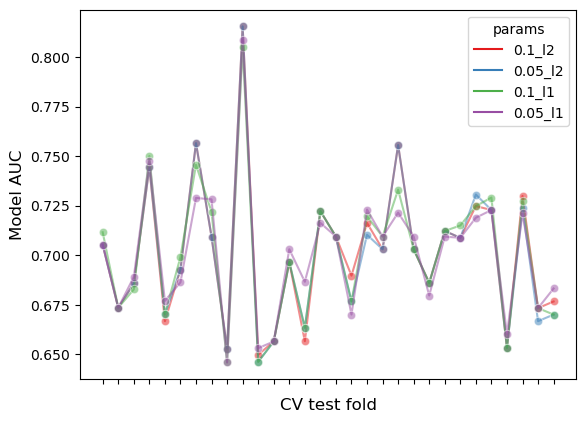

Correlation of models:
 params     0.1_l2   0.05_l2    0.1_l1   0.05_l1
params                                         
0.1_l2   1.000000  0.993227  0.975092  0.944807
0.05_l2  0.993227  1.000000  0.981620  0.957811
0.1_l1   0.975092  0.981620  1.000000  0.976469
0.05_l1  0.944807  0.957811  0.976469  1.000000


In [18]:
model_scores = results_df.filter(regex=r"split\d*_test_score")

# plot 30 examples of dependency between cv fold and AUC scores
fig, ax = plt.subplots()
sns.lineplot(
    data=model_scores.transpose().iloc[:30],
    dashes=False,
    palette="Set1",
    marker="o",
    alpha=0.5,
    ax=ax,
)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

# print correlation of AUC scores across folds
print(f"Correlation of models:\n {model_scores.transpose().corr()}")

In [19]:
import numpy as np
from scipy.stats import t


def corrected_std(differences, n_train, n_test):
    """Corrects standard deviation using Nadeau and Bengio's approach.

    Parameters
    ----------
    differences : ndarray of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    corrected_std : float
        Variance-corrected standard deviation of the set of differences.
    """
    # kr = k times r, r times repeated k-fold crossvalidation,
    # kr equals the number of times the model was evaluated
    kr = len(differences)
    corrected_var = np.var(differences, ddof=1) * (1 / kr + n_test / n_train)
    corrected_std = np.sqrt(corrected_var)
    return corrected_std


def compute_corrected_ttest(differences, df, n_train, n_test):
    """Computes right-tailed paired t-test with corrected variance.

    Parameters
    ----------
    differences : array-like of shape (n_samples,)
        Vector containing the differences in the score metrics of two models.
    df : int
        Degrees of freedom.
    n_train : int
        Number of samples in the training set.
    n_test : int
        Number of samples in the testing set.

    Returns
    -------
    t_stat : float
        Variance-corrected t-statistic.
    p_val : float
        Variance-corrected p-value.
    """
    mean = np.mean(differences)
    std = corrected_std(differences, n_train, n_test)
    t_stat = mean / std
    p_val = t.sf(np.abs(t_stat), df)  # right-tailed t-test
    return t_stat, p_val

In [21]:
model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[1].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.485
Corrected p-value: 0.314


In [22]:
model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[2].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.533
Corrected p-value: 0.298


In [23]:
model_1_scores = model_scores.iloc[0].values  # scores of the best model
model_2_scores = model_scores.iloc[3].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.474
Corrected p-value: 0.318


In [24]:
model_1_scores = model_scores.iloc[1].values  # scores of the best model
model_2_scores = model_scores.iloc[2].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.317
Corrected p-value: 0.376


In [25]:
model_1_scores = model_scores.iloc[1].values  # scores of the best model
model_2_scores = model_scores.iloc[3].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.338
Corrected p-value: 0.368


In [26]:
model_1_scores = model_scores.iloc[2].values  # scores of the best model
model_2_scores = model_scores.iloc[3].values  # scores of the second-best model

differences = model_1_scores - model_2_scores

n = differences.shape[0]  # number of test sets
df = n - 1
n_train = len(list(cv.split(X, y))[0][0])
n_test = len(list(cv.split(X, y))[0][1])

t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
print(f"Corrected t-value: {t_stat:.3f}\nCorrected p-value: {p_val:.3f}")

Corrected t-value: 0.173
Corrected p-value: 0.431


In [27]:
# initialize random variable
t_post = t(
    df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
)


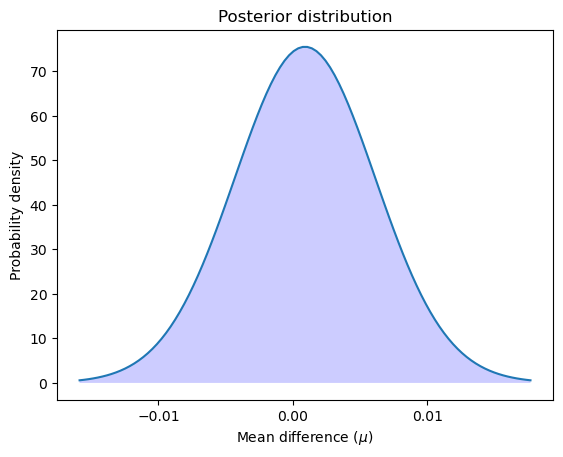

In [28]:
x = np.linspace(t_post.ppf(0.001), t_post.ppf(0.999), 100)

plt.plot(x, t_post.pdf(x))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.fill_between(x, t_post.pdf(x), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution")
plt.show()

In [29]:
better_prob = 1 - t_post.cdf(0)

print(
    f"Probability of {model_scores.index[0]} being more accurate than "
    f"{model_scores.index[1]}: {better_prob:.3f}"
)
print(
    f"Probability of {model_scores.index[1]} being more accurate than "
    f"{model_scores.index[0]}: {1 - better_prob:.3f}"
)

Probability of 0.1_l2 being more accurate than 0.05_l2: 0.569
Probability of 0.05_l2 being more accurate than 0.1_l2: 0.431


In [33]:
rope_interval = [-0.01, 0.01]
rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

print(
    f"Probability of {model_scores.index[0]} and {model_scores.index[1]} "
    f"being practically equivalent: {rope_prob:.3f}"
)

Probability of 0.1_l2 and 0.05_l2 being practically equivalent: 0.935


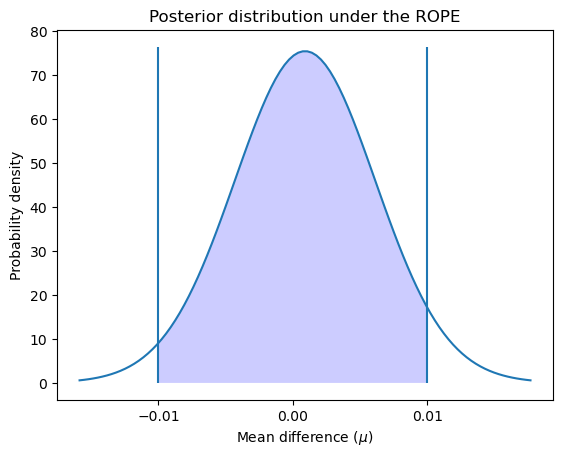

In [34]:
x_rope = np.linspace(rope_interval[0], rope_interval[1], 100)

plt.plot(x, t_post.pdf(x))
plt.xticks(np.arange(-0.04, 0.06, 0.01))
plt.vlines([-0.01, 0.01], ymin=0, ymax=(np.max(t_post.pdf(x)) + 1))
plt.fill_between(x_rope, t_post.pdf(x_rope), 0, facecolor="blue", alpha=0.2)
plt.ylabel("Probability density")
plt.xlabel(r"Mean difference ($\mu$)")
plt.title("Posterior distribution under the ROPE")
plt.show()

In [35]:
cred_intervals = []
intervals = [0.5, 0.75, 0.95]

for interval in intervals:
    cred_interval = list(t_post.interval(interval))
    cred_intervals.append([interval, cred_interval[0], cred_interval[1]])

cred_int_df = pd.DataFrame(
    cred_intervals, columns=["interval", "lower value", "upper value"]
).set_index("interval")
cred_int_df

,lower value,upper value
interval,,
0.50,-0.002654,0.004481
0.75,-0.005186,0.007013
0.95,-0.009553,0.011381


In [36]:
from itertools import combinations
from math import factorial

n_comparisons = factorial(len(model_scores)) / (
    factorial(2) * factorial(len(model_scores) - 2)
)
pairwise_t_test = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_stat, p_val = compute_corrected_ttest(differences, df, n_train, n_test)
    p_val *= n_comparisons  # implement Bonferroni correction
    # Bonferroni can output p-values higher than 1
    p_val = 1 if p_val > 1 else p_val
    pairwise_t_test.append(
        [model_scores.index[model_i], model_scores.index[model_k], t_stat, p_val]
    )

pairwise_comp_df = pd.DataFrame(
    pairwise_t_test, columns=["model_1", "model_2", "t_stat", "p_val"]
).round(3)
pairwise_comp_df

,model_1,model_2,t_stat,p_val
0,0.1_l2,0.05_l2,0.485,1
1,0.1_l2,0.1_l1,0.533,1
2,0.1_l2,0.05_l1,0.474,1
3,0.05_l2,0.1_l1,0.317,1
4,0.05_l2,0.05_l1,0.338,1
5,0.1_l1,0.05_l1,0.173,1


In [37]:
pairwise_bayesian = []

for model_i, model_k in combinations(range(len(model_scores)), 2):
    model_i_scores = model_scores.iloc[model_i].values
    model_k_scores = model_scores.iloc[model_k].values
    differences = model_i_scores - model_k_scores
    t_post = t(
        df, loc=np.mean(differences), scale=corrected_std(differences, n_train, n_test)
    )
    worse_prob = t_post.cdf(rope_interval[0])
    better_prob = 1 - t_post.cdf(rope_interval[1])
    rope_prob = t_post.cdf(rope_interval[1]) - t_post.cdf(rope_interval[0])

    pairwise_bayesian.append([worse_prob, better_prob, rope_prob])

pairwise_bayesian_df = pd.DataFrame(
    pairwise_bayesian, columns=["worse_prob", "better_prob", "rope_prob"]
).round(3)

pairwise_comp_df = pairwise_comp_df.join(pairwise_bayesian_df)
pairwise_comp_df

,model_1,model_2,t_stat,p_val,worse_prob,better_prob,rope_prob
0,0.1_l2,0.05_l2,0.485,1,0.000,0.002,0.998
1,0.1_l2,0.1_l1,0.533,1,0.010,0.100,0.890
2,0.1_l2,0.05_l1,0.474,1,0.045,0.224,0.731
3,0.05_l2,0.1_l1,0.317,1,0.009,0.039,0.952
4,0.05_l2,0.05_l1,0.338,1,0.043,0.147,0.810
5,0.1_l1,0.05_l1,0.173,1,0.021,0.044,0.935


there's no statistical significance among all four models. Threfore, the {'C': 0.05, 'penalty': 'l2'} model is chosen with the lowest fitting time.

3.3. Validation linear SVM best paramets on test data

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [51]:
lsvc = LinearSVC(C=0.05, penalty='l2', dual=False, random_state=rng).fit(X_train, y_train)

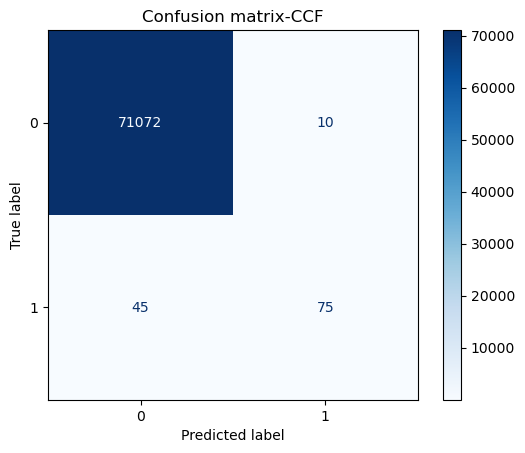

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(
    lsvc,
    X_test,
    y_test,
    #display_labels=class_names,
 #   normalize='true',
    cmap=plt.cm.Blues,
    )
    
disp.ax_.set_title('Confusion matrix-CCF')

plt.show()

In [53]:
predictions = lsvc.predict(X_test)
print(classification_report(y_test, predictions, target_names=['True','Fraud']))

              precision    recall  f1-score   support

        True       1.00      1.00      1.00     71082
       Fraud       0.88      0.62      0.73       120

    accuracy                           1.00     71202
   macro avg       0.94      0.81      0.87     71202
weighted avg       1.00      1.00      1.00     71202



### 3.2. Cost-sensitive learning on imbalanced dataset

I'll try several class weigth combinations to find the one with the best f1 on minority class

In [55]:
majority_weight = [0.1,0.5,0.9,1]
minority_weight = [1,5,10,15,50,100]

In [57]:
for majority_weight in [0.1,0.5,0.9,1]:
    for minority_weight in [1,5,10,15,50,100]:
        lsvc = LinearSVC(C=0.05, 
                         penalty='l2', 
                         dual=False, 
                         class_weight={0:majority_weight, 1:minority_weight},
                         random_state=rng
                        )
        lsvc.fit(X_train, y_train)
        predictions = lsvc.predict(X_test)
        print('----------','majority_weight', majority_weight, '|', 'minority_weight', minority_weight,'----------')
        print(classification_report(y_test, predictions, target_names=['True','Fraud']))

---------- majority_weight 0.1 | minority_weight 1 ----------
              precision    recall  f1-score   support

        True       1.00      1.00      1.00     71082
       Fraud       0.86      0.80      0.83       120

    accuracy                           1.00     71202
   macro avg       0.93      0.90      0.91     71202
weighted avg       1.00      1.00      1.00     71202

---------- majority_weight 0.1 | minority_weight 5 ----------
              precision    recall  f1-score   support

        True       1.00      1.00      1.00     71082
       Fraud       0.70      0.82      0.76       120

    accuracy                           1.00     71202
   macro avg       0.85      0.91      0.88     71202
weighted avg       1.00      1.00      1.00     71202

---------- majority_weight 0.1 | minority_weight 10 ----------
              precision    recall  f1-score   support

        True       1.00      1.00      1.00     71082
       Fraud       0.51      0.85      0.64       

---------- majority_weight 1 | minority_weight 50 ----------
              precision    recall  f1-score   support

        True       1.00      1.00      1.00     71082
       Fraud       0.70      0.82      0.76       120

    accuracy                           1.00     71202
   macro avg       0.85      0.91      0.88     71202
weighted avg       1.00      1.00      1.00     71202

---------- majority_weight 1 | minority_weight 100 ----------
              precision    recall  f1-score   support

        True       1.00      1.00      1.00     71082
       Fraud       0.51      0.85      0.64       120

    accuracy                           1.00     71202
   macro avg       0.75      0.92      0.82     71202
weighted avg       1.00      1.00      1.00     71202



In [58]:
lsvc = LinearSVC(C=0.05, 
                 penalty='l2', 
                 dual=False, 
                 class_weight={0:0.5, 1:15},
                 random_state=rng
                ).fit(X_train,y_train)

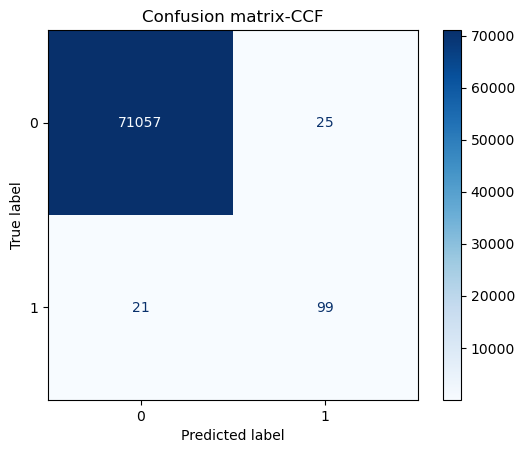

In [59]:
disp = ConfusionMatrixDisplay.from_estimator(
    lsvc,
    X_test,
    y_test,
    #display_labels=class_names,
 #   normalize='true',
    cmap=plt.cm.Blues,
    )
    
disp.ax_.set_title('Confusion matrix-CCF')

plt.show()

In [64]:
lsvc = LinearSVC(C=0.05, 
                 penalty='l2', 
                 dual=False, 
                 class_weight={0:0.5, 1:15},
                 random_state=rng
                )
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=30, random_state=0)
cos = cross_val_score(lsvc,
                          X_train,
                          y_train,
                          scoring='f1',
                          cv=cv,
                          n_jobs=-1,
                          verbose=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   41.6s finished


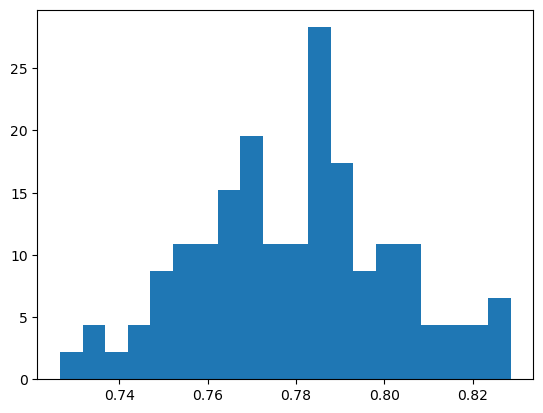

In [65]:
plt.hist(cos, bins=20, density=True)
plt.show()

Crossvalidated f1 score : 0.78
Test set f1 score : 0.81